# Book recomendations 
In this project I create a book recomendation system based on opinions of users about different books using a k-Nearest Neighbors (kNN) model.

In [1]:
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

In [3]:
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

# Cleaning data

In [4]:
df_books.head()

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [5]:
df_ratings.head()

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [6]:
df_books.isnull().sum(), df_ratings.isnull().sum()

(isbn      0
 title     0
 author    1
 dtype: int64,
 user      0
 isbn      0
 rating    0
 dtype: int64)

In [7]:
df_books.dropna(inplace=True)

In [8]:
df_books.isnull().sum(), df_ratings.isnull().sum()

(isbn      0
 title     0
 author    0
 dtype: int64,
 user      0
 isbn      0
 rating    0
 dtype: int64)

In [9]:
users_rank = df_ratings['user'].value_counts()
ind_users_mask = users_rank[users_rank<200].index.to_list()
len(ind_users_mask)

104378

In [10]:
id_mask_ratings = df_ratings[df_ratings['user'].isin(ind_users_mask)].index

In [11]:
df_ratings_new = df_ratings.drop(id_mask_ratings)
df_ratings_new

,user,isbn,rating
1456,277427,002542730X,10.0
1457,277427,0026217457,0.0
1458,277427,003008685X,8.0
1459,277427,0030615321,0.0
1460,277427,0060002050,0.0
...,...,...,...
1147612,275970,3829021860,0.0
1147613,275970,4770019572,0.0
1147614,275970,896086097,0.0
1147615,275970,9626340762,8.0


In [12]:
books_rank = df_ratings['isbn'].value_counts()
ind_books_mask = books_rank[books_rank<100].index.to_list()
len(ind_books_mask)

339825

In [13]:
id_mask_books = df_ratings_new[df_ratings_new['isbn'].isin(ind_books_mask)].index

In [14]:
df_ratings_final = df_ratings_new.drop(id_mask_books)
df_ratings_final

,user,isbn,rating
1456,277427,002542730X,10.0
1469,277427,0060930535,0.0
1471,277427,0060934417,0.0
1474,277427,0061009059,9.0
1484,277427,0140067477,0.0
...,...,...,...
1147304,275970,0804111359,0.0
1147436,275970,140003065X,0.0
1147439,275970,1400031346,0.0
1147440,275970,1400031354,0.0


In [15]:
df = df_ratings_final.pivot_table(index=['user'],columns=['isbn'],values='rating').fillna(0).T
df.head()

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
isbn,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0
0060008032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df.index = df.join(df_books.set_index('isbn'))['title']

In [17]:
df = df.sort_index()
df.head()

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# kNN model development

In [18]:
model = NearestNeighbors(metric='cosine')
model.fit(df.values)

NearestNeighbors(metric='cosine')

In [19]:
def get_recommends(title = ''):
  try:
    book = df.loc[title]
  except KeyError as e:
    print('The book: {} dont exist'.format(e))
    return

  distance, indice = model.kneighbors([book.values], n_neighbors=6)

  recommended_books = pd.DataFrame({
      'title'   : df.iloc[indice[0]].index.values,
      'distance': distance[0]
    }) \
    .sort_values(by='distance', ascending=False) \
    .head(5).values

  return [title, recommended_books]

<AxesSubplot: >

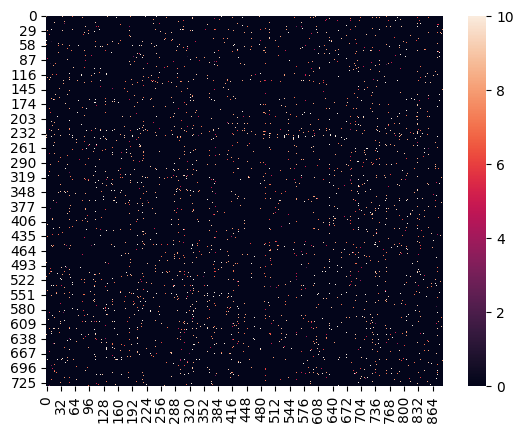

In [22]:
sns.heatmap(df.values)

In [32]:
df.T

title,1984,1st to Die: A Novel,1st to Die: A Novel,2nd Chance,2nd Chance,4 Blondes,A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",...,Wish You Well,Without Remorse,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw""",NaN,NaN,NaN,NaN
user,,,,,,,,,,,,,,,,,,,,,
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
2276,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Testing recommendations

The function outputs both the recommendation titles and the overall distance to the recommendations

In [34]:
get_recommends("The Queen of the Damned (Vampire Chronicles (Paperback))")

['The Queen of the Damned (Vampire Chronicles (Paperback))',
 array([['Catch 22', 0.793983519077301],
        ['The Witching Hour (Lives of the Mayfair Witches)',
         0.7448656558990479],
        ['Interview with the Vampire', 0.7345068454742432],
        ['The Tale of the Body Thief (Vampire Chronicles (Paperback))',
         0.5376338362693787],
        ['The Vampire Lestat (Vampire Chronicles, Book II)',
         0.5178411602973938]], dtype=object)]

In [35]:
get_recommends('1984')

['1984',
 array([["Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death",
         0.7740527391433716],
        ['The Catcher in the Rye', 0.7659322619438171],
        ['Animal Farm', 0.7618247270584106],
        ["The Bonesetter's Daughter", 0.7530066967010498],
        ["The Handmaid's Tale", 0.7508387565612793]], dtype=object)]

In [36]:
get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")

["Where the Heart Is (Oprah's Book Club (Paperback))",
 array([["I'll Be Seeing You", 0.8016210794448853],
        ['The Weight of Water', 0.7708583474159241],
        ['The Surgeon', 0.7699410915374756],
        ['I Know This Much Is True', 0.7677075266838074],
        ['The Lovely Bones: A Novel', 0.7234864234924316]], dtype=object)]

In [33]:
get_recommends('A Case of Need')

['A Case of Need',
 array([['Jurassic Park', 0.8429337739944458],
        ['A Widow for One Year', 0.8395146131515503],
        ['A Widow for One Year', 0.8382203578948975],
        ['The Client', 0.8376034498214722],
        ['On the Road', 0.828385055065155]], dtype=object)]